<a href="https://colab.research.google.com/github/flipper26/Code/blob/main/Boston_House_Price_Prediction_XGBRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing Boston House Price Dataset

In [24]:
#Importing a dataset from the sklearn library
house_price_dataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [25]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [26]:
#loading the dataset to a pandas Dataframe
housePricePdDataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [27]:
#Add the target(Price) column to the dataframe
housePricePdDataframe['PRICE'] = house_price_dataset.target

In [28]:
housePricePdDataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
# check the number of rows and columns
housePricePdDataframe.shape

(506, 14)

In [30]:
#Check for missing values
housePricePdDataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [31]:
#Get statistical measures of the dataset
housePricePdDataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between various features in the dataset

1. Positive correlation 
2. Negative correlation

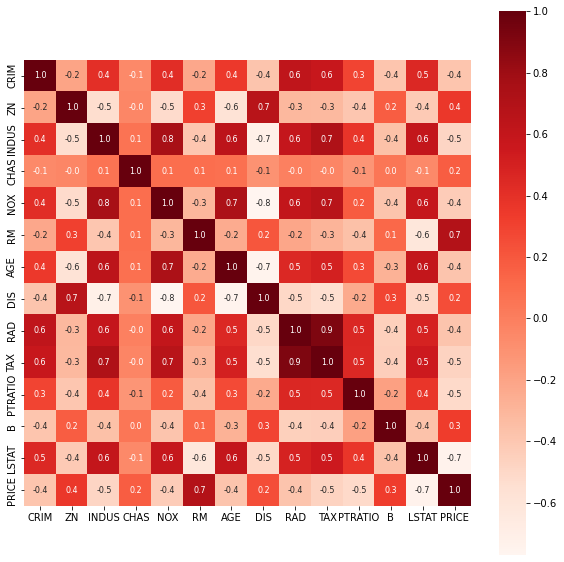

In [32]:
correlation = housePricePdDataframe.corr()

#constructing a heatmap to understand the correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Reds')

In [34]:
#Separating Data and Lables
X = housePricePdDataframe.drop(columns='PRICE', axis=1)
Y = housePricePdDataframe['PRICE']

Splitting the data in to train set and test set

In [39]:
#in the following 0.1 means 10% of the data will become test date.
#Stratify = Y means that we need the equal representation of each value in the Y column in the test data
#Random state is used to be able to split the data in the same way each time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [41]:
print(X_train)
print(Y_train)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
321  0.18159   0.0   7.38   0.0  0.493  ...  5.0  287.0     19.6  396.90   6.87
37   0.08014   0.0   5.96   0.0  0.499  ...  5.0  279.0     19.2  396.90   8.77
286  0.01965  80.0   1.76   0.0  0.385  ...  1.0  241.0     18.2  341.60  12.93
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
25   0.84054   0.0   8.14   0.0  0.538  ...  4.0  307.0     21.0  303.42  16.51
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
22   1.23247   0.0   8.14   0.0  0.538  ...  4.0  307.0     21.0  396.90  18.72
72   0.09164   0.0  10.81   0.0  0.413  ...  4.0  305.0     19.2  390.91   5.52
493  0.17331   0.0   9.69   0.0  0.585  ...  6.0  391.0     19.2  396.90  12.01
15   0.62739   0.0   8.14   0.0  0.538  ...  4.0  307.0     21.0  395.62   8.47
168  2.30040   0.0  19.58   0.0  0.605  ...  5.0  403.0     14.7  297.09  11.10

[404 rows x 13 columns]
321    23.1
37 

Model training --> XGBoost Regressor

In [43]:
#loading the model
model = XGBRegressor()

In [44]:
#training the logistic regression model with the trainig data
model.fit(X_train, Y_train)

[19:35:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Model eveluation

In [49]:
#Accuracy on the training data
X_train_prediction = model.predict(X_train)

#R squared error (The closer to zero the better)
Score1 = metrics.r2_score(Y_train, X_train_prediction) 
print('R2: ', Score1)

#Mean Absolute error (The closer to zero the better)
Score2 = metrics.mean_absolute_error(Y_train, X_train_prediction) 
print('Mean Absolute error: ', Score2)

R2:  0.9733349094832763
Mean Absolute error:  1.145314053261634


Visualise the actual prices VS the predicted prices

Text(0.5, 1.0, 'Actual Price VS predicted Price')

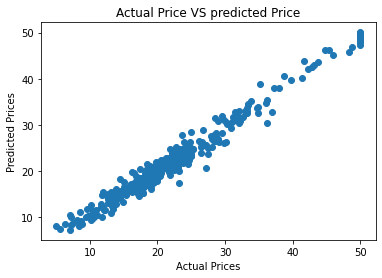

In [53]:
plt.scatter(Y_train,X_train_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price VS predicted Price")

In [50]:
#Accuracy on the test data
X_test_prediction = model.predict(X_test)

#R squared error (The closer to zero the better)
Score1 = metrics.r2_score(Y_test, X_test_prediction) 
print('R2: ', Score1)

#Mean Absolute error (The closer to zero the better)
Score2 = metrics.mean_absolute_error(Y_test, X_test_prediction) 
print('Mean Absolute error: ', Score2)

R2:  0.9115937697657654
Mean Absolute error:  1.9922956859364223


Text(0.5, 1.0, 'Actual Price VS predicted Price')

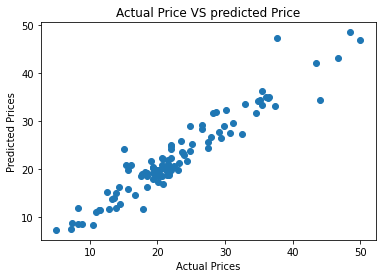

In [54]:
plt.scatter(Y_test,X_test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price VS predicted Price")